# Task 2.1 - Simulating Gompertz

* Simulate the growth of tumor cells for t=1200. Does the growth reach a steady state? 
* If it has not, then experiment with the final time and determine the Time required to reach a steady state. 
* What will happen if the value of M is changed - pick two values on either side of the value given.


In [43]:
# Imports reqired packages 
import numpy as np
import random
import matplotlib.pyplot as plt

In [44]:
# Preset peramiters 
k = 0.006
N0 = 10**9
M = 10**13
h = 1
maxTime = 120000

In [45]:
# Function to simulate a signle cell's crowth 
def SignleCellsGrowth(h, k, M, InishalN, maxTime):
    print("Single Cells growth")
    maxHit = False
    N = []
    times = []

    previousValue = InishalN
    ThisValue = 0

    t = 0 + h

    HitMax = False
    MaxHitTime = 0

    while maxHit == False:
        ThisValue = previousValue + h * k * previousValue * np.log(M / previousValue)
        times.append(t)
        N.append(ThisValue)

        if HasItReachedSteadyState(previousValue, ThisValue,t) == True or maxTime == t:
            #print(t)
            
            maxHit = True
            HitMax = True
            MaxHitTime = t
            break
        else:
            previousValue = ThisValue
            t = t + h

    return times, N, HitMax, MaxHitTime

In [46]:
# Function to determine if the new value is at the steady state 
def HasItReachedSteadyState(PreviousValue, NewValue, time):
    target = 1.00001 * PreviousValue
    # If the previous value and the new value are very close to each other
    if NewValue <= target and NewValue >= PreviousValue:
        print("Has reached steady state at time:",time)
        return True
    else:
        return False

In [ ]:
# Function for displaying a graph representing output
def DisplayGraph(Values, Times, mValue, MaxTime):
    plt.plot(Times, Values, label=f'M={mValue:.0e}')
    # if max time was hit so not 0 then it will display a dotted like in red 
    if MaxTime != 0:
        plt.axvline(x=MaxTime, color='r', linestyle='--', label=f'Max Time = {MaxTime}')
    plt.xlabel('Time')
    plt.ylabel('Number of Cells')
    plt.title('Gompertz Model of Tumor Growth')
    plt.legend()
    plt.grid(True)
    plt.show()


Single Cells growth
Has reached steady state at time: 1438


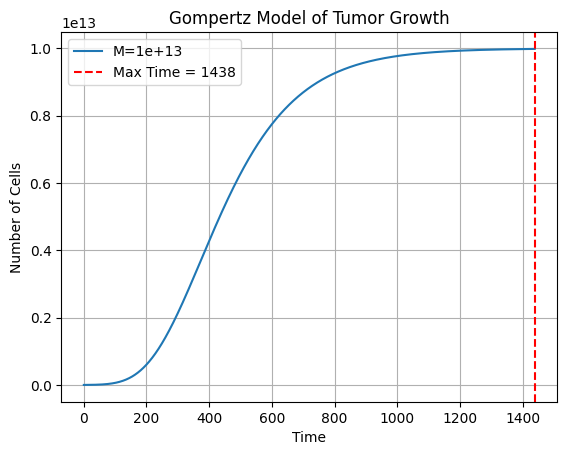

In [48]:
# Run growth for single cell 
Times, NValues, MaxHit, maxHitTime = SignleCellsGrowth(h, k, M, N0, maxTime)

#plt.plot(Times, NValues, label=f"M={M}")

DisplayGraph(NValues,Times,M,maxHitTime)